### Misclassification Rate of various models for Breast Cancer Detection

#### Import relevant libraries

In [1]:
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### Load Data

In [2]:
df = pd.read_csv("breast-cancer-wisconsin.csv", header = None)
df.drop(df.columns[0],axis= 1, inplace = True) #drop ID
df.rename({10:'Label'}, axis='columns', inplace = True)
df.Label[df.Label == 2] = 0 #normalizing to 0 ; healthy
df.Label[df.Label == 4] = 1 #normalizing to 1 ; sick
# df['Label'].replace([2,4], [0,1], inplace=True)

In [3]:
y= df['Label']
x= df.drop('Label', axis =1)

#### Split data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y.values,train_size=400, random_state=42)

#### final dataframe

In [5]:
# report dataframe
data = {'Type': [] ,
        'Misclassification rate': [] ,
        'Cost': [],
        }
#create dataframe
data = pd.DataFrame(data)

#### Functions

In [6]:
def match(Input1, Input2): 
    Output = [index for index, elem in enumerate(Input2) if elem == Input1[index]] 
    return Output
# Confusion matrix 
#TP = confusion[1, 1], TN = confusion[0, 0], FP = confusion[0, 1], FN = confusion[1, 0]
def matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)
#misclassification rate
def classification_error(y_test, y_pred):
    confusion = matrix(y_test,y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    cost= FP*1 + FN*100
    return (cost,(FP + FN) / (float(TP + TN + FP + FN))*100)

# def cost(y_test, y_pred):
#     return classification_error(y_test, y_pred)[0]
    
def add_to_df(name, error, cost):
    global data
    new_row = {'Type':name, 'Misclassification rate':error, 'Cost':cost}
    data = data.append(new_row, ignore_index=True)
    return data

    
def rms_margin(X_test, y_test, y_pred):
    #get the indexes where y_test is equal y_pred
    matched_index = match(y_test, y_pred)

    pred_prob = clf.predict_proba(X_test)
    pi= pred_prob[matched_index]

    max_val=[]
    for item in pi: 
        max_val.append(max(item))
    i=0
    summed=0
    for i in range(0,len(pi)):
        summed=summed+((max_val[i]-0.5)**2)
    rms = math.sqrt(summed/len(pi))
    return rms 


#### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# instantiate model
clf = LogisticRegression()

# fit model
clf.fit(X_train, y_train)

# make class predictions for the testing set
y_pred = clf.predict(X_test)

# calculate accuracy
print("Accuracy Score:" , accuracy_score(y_test, y_pred)*100)

Accuracy Score: 96.113074204947


In [8]:
print("RMS Margin", rms_margin(X_test, y_test, y_pred))
print("Confusion Matrix: \n" , matrix(y_test, y_pred))
error= classification_error(y_test, y_pred)[1]
print("Misclassification rate: " ,error)
#or
print("Misclassification rate: " ,(1 - accuracy_score(y_test, y_pred))*100)
cost= classification_error(y_test, y_pred)[0]
print("Cost : " ,cost)

temp=add_to_df('Logistic Regression', error, cost)


RMS Margin 0.48076828067821015
Confusion Matrix: 
 [[179   2]
 [  9  93]]
Misclassification rate:  3.8869257950530036
Misclassification rate:  3.886925795053009
Cost :  902


#### kNN

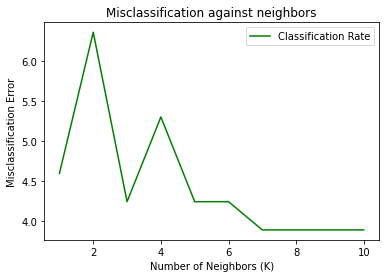

In [9]:
#https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
from sklearn.neighbors import KNeighborsClassifier as kNN

neighbors = list(range(1,11))

# empty 
err = []
cost=[]

for k in neighbors:
    knn = kNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error= classification_error(y_test, y_pred)[1]
    err.append(error)
    cst= classification_error(y_test, y_pred)[0]
    cost.append(cst)
    
    temp =add_to_df('kNN n_neighbors:1...11', error, cst)
plt.plot(neighbors, err, label= 'Classification Rate', c='g')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Misclassification Error")
plt.title("Misclassification against neighbors")
plt.legend()
plt.show()

#### LDA

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

clf = LDA()
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy :" , accuracy_score(y_test, y_pred)*100)
error= classification_error(y_test, y_pred)[1]
print("Classification Error: " ,error )
cost= classification_error(y_test, y_pred)[0]
print("Cost: " ,cost )

temp =add_to_df('LDA', error, cost)


Accuracy : 95.40636042402826
Classification Error:  4.593639575971731
Cost:  1102


#### SVM

In [11]:
from sklearn import svm

#Create a linear svm Classifier
clf = svm.SVC(kernel='linear', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy :" , accuracy_score(y_test, y_pred)*100)
error= classification_error(y_test, y_pred)[1]
print("Classification Error: " ,error )
cost= classification_error(y_test, y_pred)[0]
print("Cost: " ,cost )

print("RMS Margin", rms_margin(X_test, y_test, y_pred))


temp =add_to_df('linear svm', error, cost)

Accuracy : 95.75971731448763
Classification Error:  4.240282685512367
Cost:  903
RMS Margin 0.4642016807093179


In [12]:
#Create a rbf svm Classifier
clf = svm.SVC(kernel='rbf', probability=True) # rbf Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy :" , accuracy_score(y_test, y_pred)*100)
error= classification_error(y_test, y_pred)[1]
print("Classification Error: " ,error )
cost= classification_error(y_test, y_pred)[0]
print("Cost: " ,cost )

print("RMS Margin", rms_margin(X_test, y_test, y_pred))


temp =add_to_df('rbf svm', error, cost)

Accuracy : 96.113074204947
Classification Error:  3.8869257950530036
Cost:  803
RMS Margin 0.4725540307600691


In [13]:
#Create a linear svm Classifier
clf = svm.SVC(kernel='sigmoid', probability=True) # sigmoid Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy :" , accuracy_score(y_test, y_pred)*100)
error= classification_error(y_test, y_pred)[1]
print("Classification Error: " ,error )
cost= classification_error(y_test, y_pred)[0]
print("Cost: " ,cost )

print("RMS Margin", rms_margin(X_test, y_test, y_pred))

temp =add_to_df('sigmoid svm', error, cost)

Accuracy : 46.64310954063604
Classification Error:  53.35689045936396
Cost:  10249
RMS Margin 0.46639396335929195


In [14]:
degree = [2,3,4,5]
for k in degree: 
    #Create a poly svm Classifier
    clf = svm.SVC(kernel='poly', degree=k, probability=True) # polynomial Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    

#     print(f"Accuracy with {k} degrees:" , accuracy_score(y_test, y_pred)*100)
    error= classification_error(y_test, y_pred)[1]
    print(f"Misclassification rate with {k} degree polynomial:" ,error )
    cost= classification_error(y_test, y_pred)[0]
    print(f"Cost with {k} degree polynomial:" ,cost )

    print("RMS Margin: ", rms_margin(X_test, y_test, y_pred))

    temp =add_to_df('poly svm', error, cost)

Misclassification rate with 2 degree polynomial: 4.240282685512367
Cost with 2 degree polynomial: 903
RMS Margin:  0.46731929055273663
Misclassification rate with 3 degree polynomial: 5.30035335689046
Cost with 3 degree polynomial: 1302
RMS Margin:  0.44895787623438577
Misclassification rate with 4 degree polynomial: 5.30035335689046
Cost with 4 degree polynomial: 1302
RMS Margin:  0.425632915671306
Misclassification rate with 5 degree polynomial: 6.36042402826855
Cost with 5 degree polynomial: 1602
RMS Margin:  0.42848711095589254


Based on above results we can see that the largest RMS margin was obtained from the Logistic regression. The RMS margin from the SVM's were lower. The lowest margins were obtained from the polynomial kernals. 

#### Decision Tree

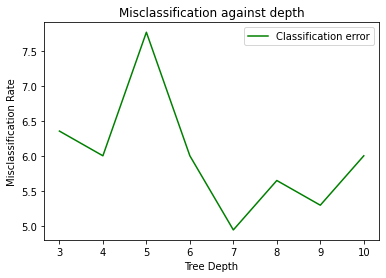

In [15]:
from sklearn.tree import DecisionTreeClassifier

err = []
cost=[]
depth = [3, 4, 5, 6, 7, 8, 9, 10]
for d in depth: 
    # Create Decision Tree classifer object
    decision_tree = DecisionTreeClassifier(
#                                             random_state=42, 
                                            max_depth=d)

    # Train Decision Tree Classifer
    decision_tree = decision_tree.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = decision_tree.predict(X_test)
    
    error= classification_error(y_test, y_pred)[1]
    err.append(error)
    cst= classification_error(y_test, y_pred)[0]
    cost.append(cst)
    
    temp =add_to_df('Decision Tree Depth:[3...10]', error, cst)
   
plt.plot(depth, err, label= 'Classification error', c='g')
plt.xlabel("Tree Depth")
plt.ylabel("Misclassification Rate")
plt.title("Misclassification against depth")
plt.legend()
plt.show()

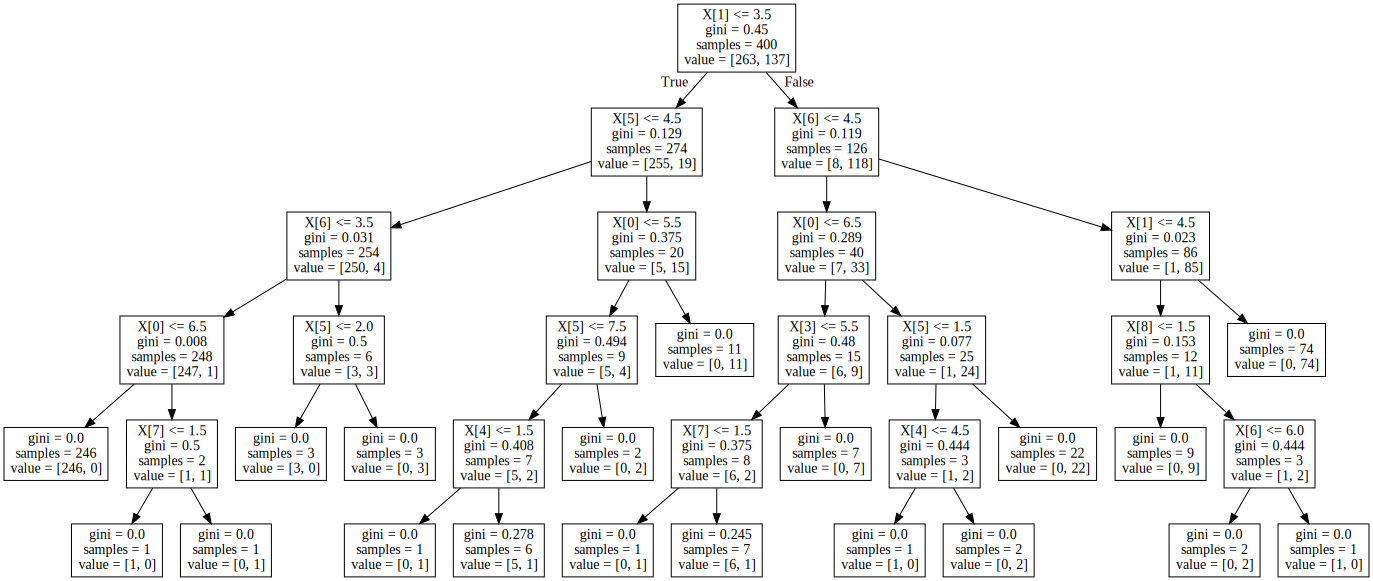

In [16]:
from sklearn import tree
import graphviz 
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree = decision_tree.fit(X_train,y_train)

dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph_data = graphviz.Source(dot_data) 
graph_data

#### AdaBoost, XGBoost, RandomForest

In [17]:
from sklearn.ensemble import AdaBoostClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


wild = list(range(100,600,100))
for trees in wild :
    print(f"Depth:{trees}")
    clf = AdaBoostClassifier(n_estimators=trees, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
#     print(f"Accuracy using AdaBoost:",clf.score(X_test, y_test)*100)
    error = classification_error(y_test, y_pred)[1]
    cost = classification_error(y_test, y_pred)[0]
    print(f"Misclassification rate using AdaBoost:" , error)
    temp =add_to_df('Adaboost, trees[100...600]', error, cost)

    
    clf = XGBClassifier(n_estimators=trees, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
#     print(f"Accuracy using XGB:",clf.score(X_test, y_test)*100)
    error = classification_error(y_test, y_pred)[1]
    cost = classification_error(y_test, y_pred)[0]
    print(f"Misclassification rate using XGBoost:" , error)
    temp =add_to_df('XGBoost, trees[100...600]', error, cost)
    
    
    clf = RandomForestClassifier(n_estimators=trees, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
#     print(f"Accuracy using RandomForestClassifer:",clf.score(X_test, y_test)*100)
    error = classification_error(y_test, y_pred)[1]
    cost = classification_error(y_test, y_pred)[0]
    print(f"Misclassification rate using RandomForestClassifer:" , error)
    temp =add_to_df('RandomForest, trees[100...600]', error, cost)
    print("\n")

Depth:100
Misclassification rate using AdaBoost: 7.06713780918728
Misclassification rate using XGBoost: 4.593639575971731
Misclassification rate using RandomForestClassifer: 3.8869257950530036


Depth:200
Misclassification rate using AdaBoost: 6.36042402826855
Misclassification rate using XGBoost: 3.8869257950530036
Misclassification rate using RandomForestClassifer: 3.180212014134275


Depth:300
Misclassification rate using AdaBoost: 6.713780918727916
Misclassification rate using XGBoost: 3.8869257950530036
Misclassification rate using RandomForestClassifer: 2.8268551236749118


Depth:400
Misclassification rate using AdaBoost: 6.713780918727916
Misclassification rate using XGBoost: 4.240282685512367
Misclassification rate using RandomForestClassifer: 2.8268551236749118


Depth:500
Misclassification rate using AdaBoost: 7.773851590106007
Misclassification rate using XGBoost: 4.240282685512367
Misclassification rate using RandomForestClassifer: 2.8268551236749118




In [18]:
data['Weighted cost']=data['Cost']/6916
print(data.loc[data['Weighted cost'] == min(data['Weighted cost']), 'Type'].iloc[0])
print(data.loc[data['Misclassification rate'] == min(data['Misclassification rate']), 'Type'].iloc[0])
data

RandomForest, trees[100...600]
RandomForest, trees[100...600]


,Type,Misclassification rate,Cost,Weighted cost
0,Logistic Regression,3.886926,902.0,0.130422
1,kNN n_neighbors:1...11,4.593640,1102.0,0.159341
2,kNN n_neighbors:1...11,6.360424,1701.0,0.245951
3,kNN n_neighbors:1...11,4.240283,1002.0,0.144881
4,kNN n_neighbors:1...11,5.300353,1401.0,0.202574
5,kNN n_neighbors:1...11,4.240283,1002.0,0.144881
6,kNN n_neighbors:1...11,4.240283,1002.0,0.144881
7,kNN n_neighbors:1...11,3.886926,902.0,0.130422
8,kNN n_neighbors:1...11,3.886926,902.0,0.130422
9,kNN n_neighbors:1...11,3.886926,902.0,0.130422


Based on the table above we can see that the algorithm that resulted in the lowest weighted cost are RandomForest using a maximum depth of 300,400 and 500 and the same also resulted in the lowest misclassification rate